In [ ]:
from google.colab import drive
import shutil
import os
import pandas as pd
import zipfile

# Step 1: Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Step 2: Copy the kaggle.json file
kaggle_json_path = '/content/drive/My Drive/kaggle.json'
os.makedirs('/root/.kaggle', exist_ok=True)
shutil.copy(kaggle_json_path, '/root/.kaggle/kaggle.json')
os.chmod('/root/.kaggle/kaggle.json', 600)

# Step 3: Download the dataset
!kaggle datasets download -d sakshisatre/social-advertisement-dataset

# Step 4: Unzip the dataset
with zipfile.ZipFile("social-advertisement-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("data")

# Step 5: Load the data
df = pd.read_csv("data/social_ads.csv")


Dataset URL: https://www.kaggle.com/datasets/sakshisatre/social-advertisement-dataset
License(s): apache-2.0
social-advertisement-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
df.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [ ]:
df.tail(8)

,Age,EstimatedSalary,Purchased
392,45,45000,1
393,60,42000,1
394,39,59000,0
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [ ]:
bins = [0, 17, 24, 34, 44, 54, 64, 100]
labels = ['Teenager', 'Young Adult', 'Millennial', 'Gen X', 'Older Gen X', 'Boomer', 'Senior']
df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)
df.head()

,Age,EstimatedSalary,Purchased,Age_Category
0,19,19000,0,Young Adult
1,35,20000,0,Gen X
2,26,43000,0,Millennial
3,27,57000,0,Millennial
4,19,76000,0,Young Adult


In [ ]:
df.shape

(400, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Age              400 non-null    int64   
 1   EstimatedSalary  400 non-null    int64   
 2   Purchased        400 non-null    int64   
 3   Age_Category     400 non-null    category
dtypes: category(1), int64(3)
memory usage: 10.2 KB


In [ ]:
for column in df.columns:
    num_distinct = df[column].nunique()
    print(f"{column}: {num_distinct} distinct values")

Age: 43 distinct values
EstimatedSalary: 117 distinct values
Purchased: 2 distinct values
Age_Category: 5 distinct values


In [ ]:
age_range = df['Age'].agg(['min', 'max'])
salary_range = df['EstimatedSalary'].agg(['min', 'max'])

print(f"The ages in this dataset range from {age_range['min']} to {age_range['max']}.")
print(f"The salaries in this dataset range from {salary_range['min']} to {salary_range['max']}.")

The ages in this dataset range from 18 to 60.
The salaries in this dataset range from 15000 to 150000.


In [ ]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 33


In [ ]:
df['Age_Category'].value_counts()

,count
Age_Category,
Gen X,144
Millennial,103
Older Gen X,79
Young Adult,43
Boomer,31
Teenager,0
Senior,0


In [ ]:
df.describe().round(2)

,Age,EstimatedSalary,Purchased
count,400.00,400.00,400.00
mean,37.66,69742.50,0.36
std,10.48,34096.96,0.48
min,18.00,15000.00,0.00
25%,29.75,43000.00,0.00
50%,37.00,70000.00,0.00
75%,46.00,88000.00,1.00
max,60.00,150000.00,1.00


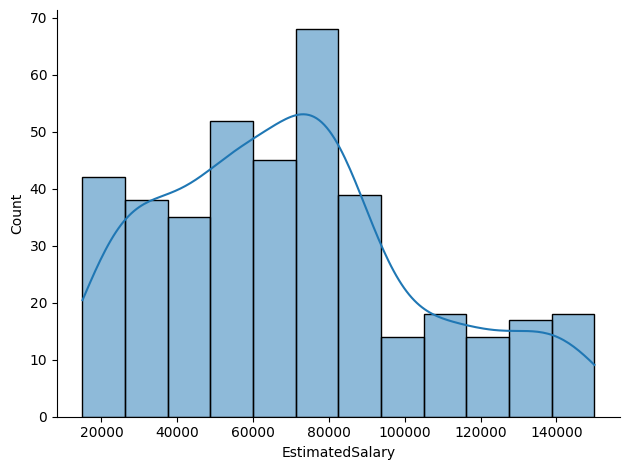

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='EstimatedSalary', kde=True)
sns.despine()  # Remove top and right spines by default
plt.tight_layout()
plt.show()

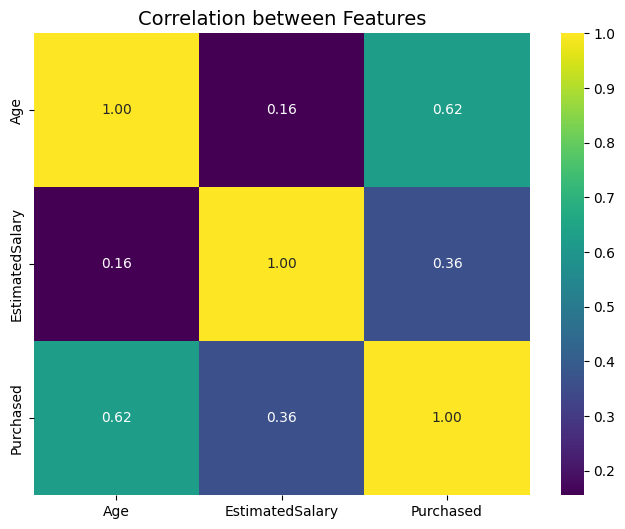

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust figsize for better readability
sns.heatmap(df[['Age', 'EstimatedSalary', 'Purchased']].corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation between Features", fontsize=14)  # Increase fontsize for title
plt.show()

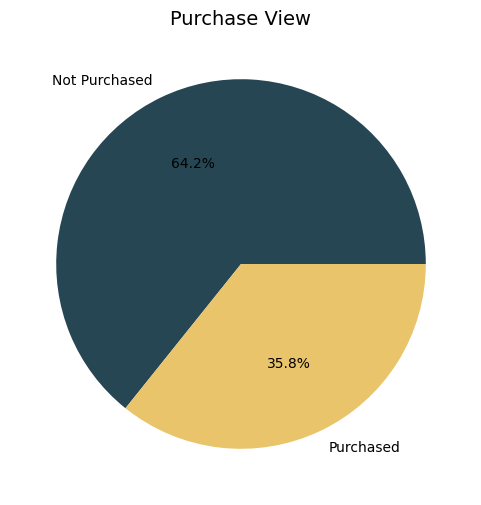

In [ ]:
# Define colors and labels
colors = ['#5F0F40', '#9A031E']  # Deep magenta and strong red

colors = ['#264653', '#E9C46A']  # Slate blue and muted gold

# Calculate purchase counts
purchased_counts = df["Purchased"].value_counts()

# Create the pie chart
plt.figure(figsize=(7, 6))
# Use labels that correspond to the 'Purchased' column values
plt.pie(purchased_counts, labels=['Not Purchased', 'Purchased'], autopct="%1.1f%%", colors=colors)
plt.title("Purchase View", fontsize=14)  # Increase fontsize for title
plt.show()

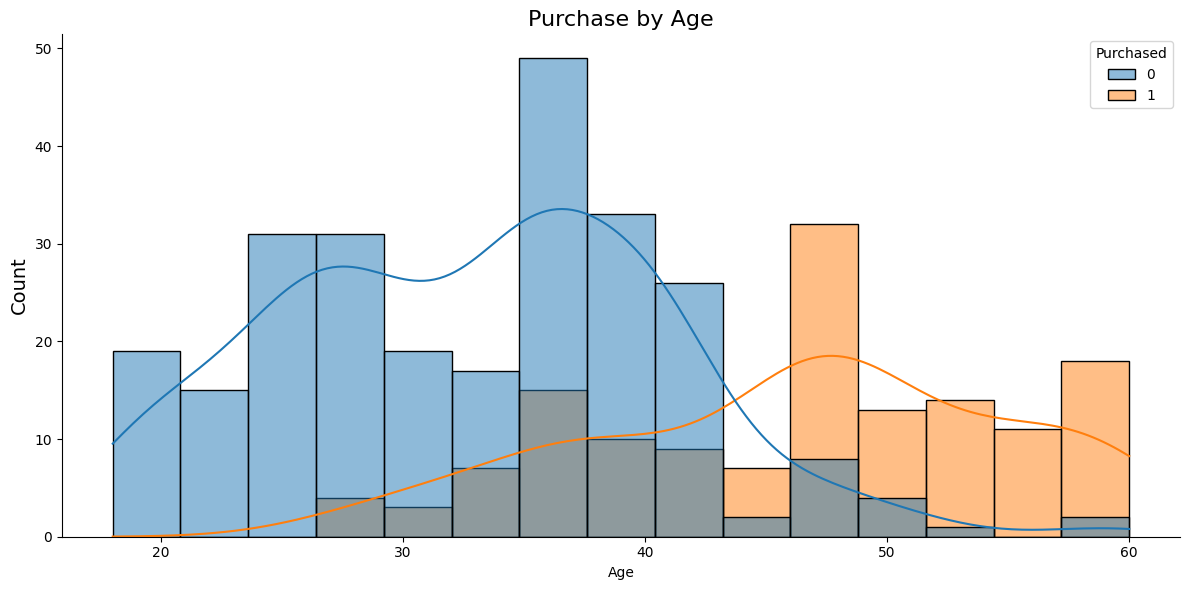

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#1F77B4', '#FF7F0E']  # Deep blue and vivid orange

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Purchased', palette=colors, kde=True, bins=15)
plt.ylabel('Count', fontsize=14)  # Add y-axis label
plt.title('Purchase by Age', fontsize=16)  # Increase title fontsize and improve wording
sns.despine()  # Remove top and right spines by default
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

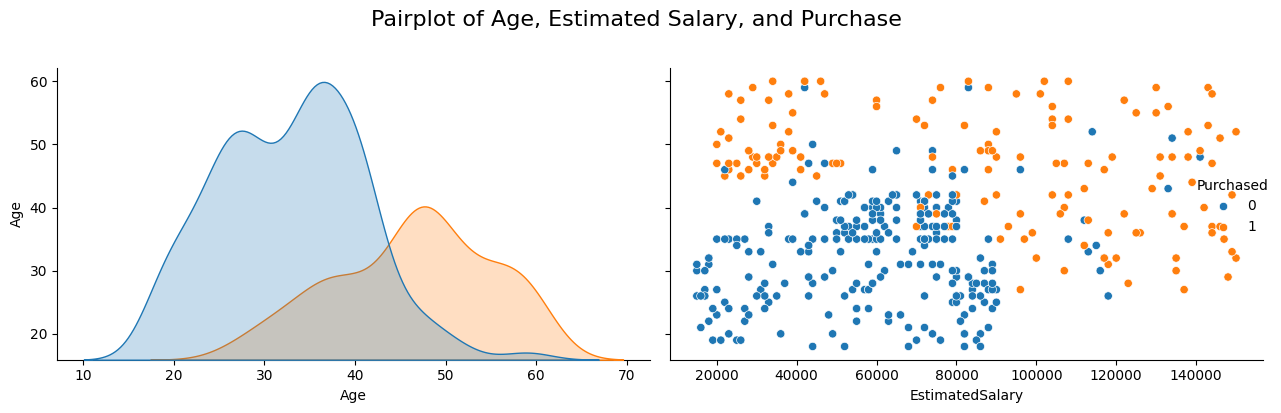

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#1F77B4', '#FF7F0E']

plt.figure(figsize=(12, 6))
g = sns.pairplot(data=df, x_vars=['Age', 'EstimatedSalary'], y_vars='Age', hue='Purchased',
             palette=colors, aspect=1.5, height=4)
plt.suptitle('Pairplot of Age, Estimated Salary, and Purchase', y=1.02, fontsize=16)
sns.despine()
plt.tight_layout()
plt.show()

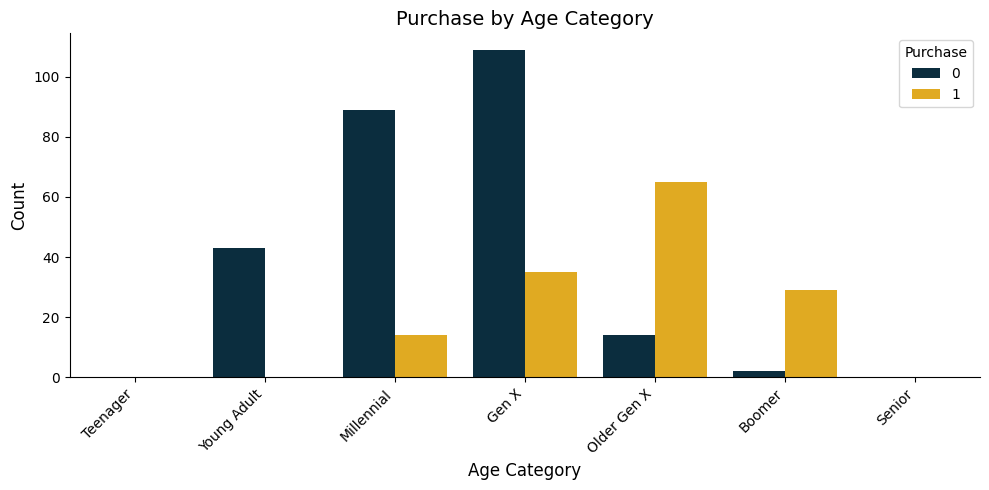

In [ ]:

custom_colors = ['#023047', '#ffb703']

plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='Age_Category', hue='Purchased', palette=custom_colors)

ax.set_ylabel('Count', fontsize=12)  # Add y-axis label
ax.set_title('Purchase by Age Category', fontsize=14)  # Add title
ax.set_xlabel('Age Category', fontsize=12)  # Add x-axis label
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
ax.legend(title='Purchase', loc='upper right')  # Adjust legend position
sns.despine()
plt.tight_layout()
plt.show()

\

In [ ]:
age_category_purchase_percentages = (
    df.groupby('Age_Category', observed=True)['Purchased'].value_counts(normalize=True)
      .mul(100).round(2)
)
age_category_purchase_percentages

Age_Category  Purchased
Young Adult   0            100.00
Millennial    0             86.41
              1             13.59
Gen X         0             75.69
              1             24.31
Older Gen X   1             82.28
              0             17.72
Boomer        1             93.55
              0              6.45
Name: proportion, dtype: float64

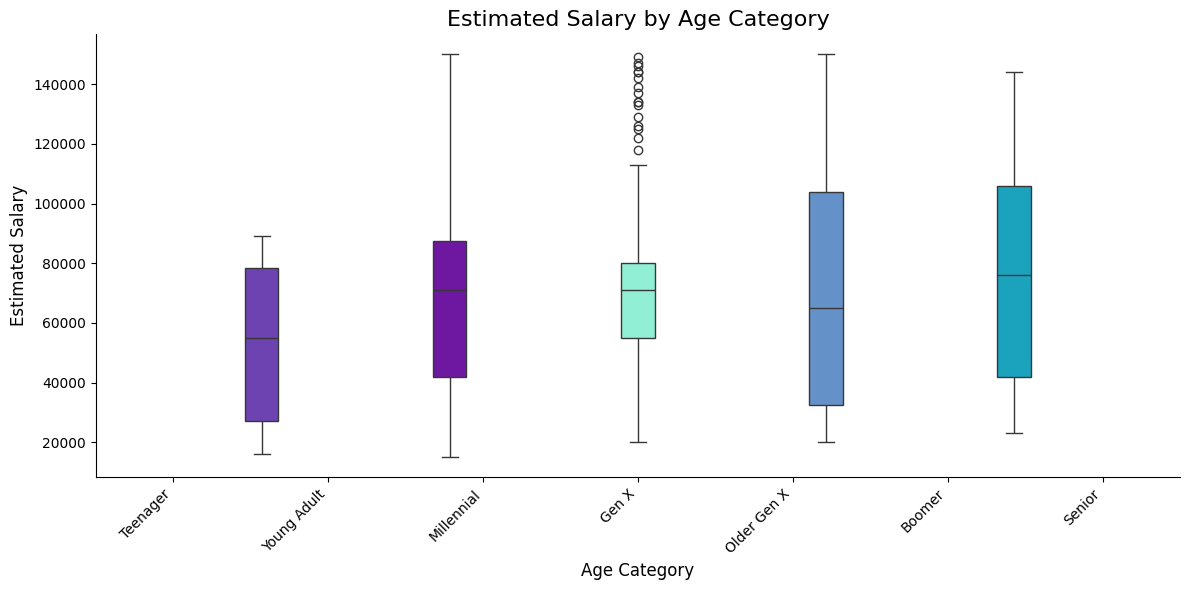

In [ ]:
# Custom color palette (expanded to 7 colors)
custom_colors = ['#5E60CE', '#6930C3', '#7400B8', '#80FFDB', '#5390D9', '#00B4D8', '#0077B6']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Age_Category', y='EstimatedSalary', width=1.5, palette=custom_colors, hue='Age_Category', legend=False) #Assigning hue and legend = False

plt.title('Estimated Salary by Age Category', fontsize=16)
plt.xlabel('Age Category', fontsize=12)
plt.ylabel('Estimated Salary', fontsize=12)
plt.xticks(rotation=45, ha='right')

sns.despine()
plt.tight_layout()
plt.show()

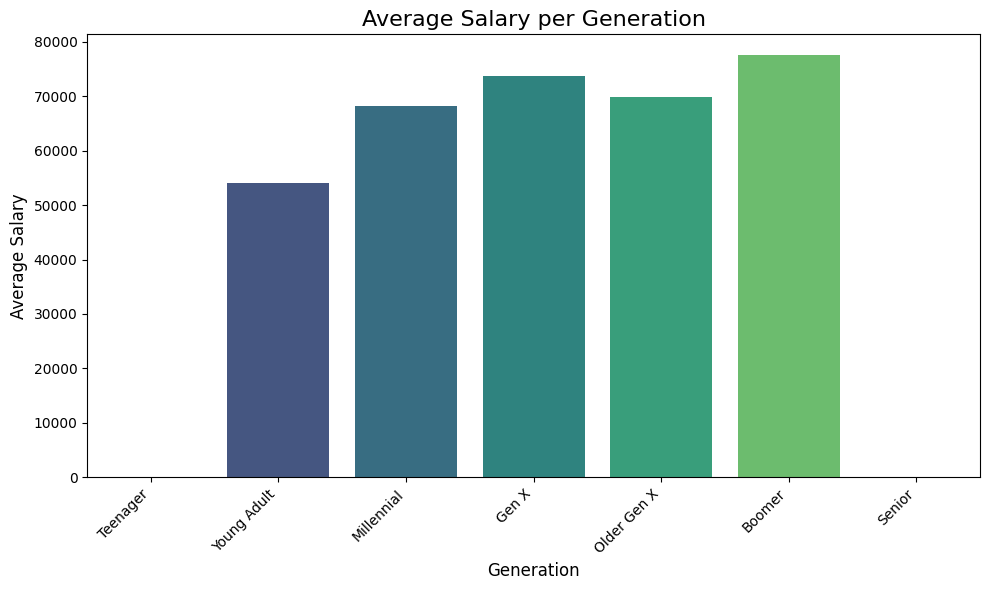

Age_Category  EstimatedSalary
 Young Adult         54023.26
  Millennial         68242.72
 Older Gen X         69898.73
       Gen X         73756.94
      Boomer         77483.87


In [ ]:
# Calculate average salary per generation
salary_by_generation = df.groupby('Age_Category', observed=True)['EstimatedSalary'].mean().round(2).reset_index().sort_values(by='EstimatedSalary')

# Create a bar plot for visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Category', y='EstimatedSalary', data=salary_by_generation, hue='Age_Category', palette='viridis', legend=False, dodge=False)
plt.title('Average Salary per Generation', fontsize=16)
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Average Salary', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

# Display the values in a formatted table
print(salary_by_generation.to_string(index=False))

###  Insight Report: Social Advertisement Dataset Analysis

This analysis performs an in-depth **exploratory data analysis (EDA)** on a social advertisement dataset to examine the relationship between **age**, **estimated salary**, and **purchasing behavior**. It provides both statistical observations and strategic insights, especially in terms of targeting generational segments more effectively through advertising.

### 1. **Data Preparation & Feature Engineering**

* The dataset was sourced from Kaggle and cleaned for analysis.
* An `Age_Category` column was created, grouping individuals into generational cohorts (e.g., Teenagers, Young Adults, Millennials, Gen X, Boomers).
* Initial diagnostics were conducted to assess data quality, including checks for missing values, data types, duplicates, and outliers.


### 2. **Exploratory Data Analysis (EDA)**

####  **Univariate Analysis**

* **Age and Salary Distributions:**

  * The dataset exhibits a **positively skewed distribution** in both age and salary.
  * **Millennials** are the most represented age group in the dataset.
  * No significant outliers were found, indicating clean and usable data.

####  **Bivariate Analysis**

* **Heatmap of Correlations:**

  * A **moderate to strong correlation** was observed between `Age` and `Purchased`.
  * Salary had a weaker direct correlation with purchasing, suggesting other factors may play a role.
* **Pie Chart and Count Plots:**

  * The percentage of users who made a purchase is relatively **low across the dataset**.
  * Older generations, particularly Gen X and Boomers, **tend to purchase more** regardless of their income level.
  * **Gen Z and younger Millennials showed low purchasing behavior**, although this may be influenced by smaller sample sizes.

####  **Multivariate Analysis**

* **Box and Bar Plots:**

  * Salary distributions differ across generations, with **Millennials earning more on average** than Gen X or Boomers.
  * Visualizations show that **purchasing behavior is not strictly income-driven**; for instance, some lower-income older users purchase more frequently than younger, higher-earning users.
* **Purchase Percentages by Generation:**

  * Although Millennials dominate the dataset in volume, their **purchase rates are comparable to older generations**.
  * **Gen Z has minimal purchase activity**, indicating potential disengagement or lack of targeting.

### 3. **Key Insights and Strategic Implications**

####  **Age & Purchase Behavior**

* Purchasing increases with age, **independent of salary**, suggesting that life stage and priorities may be more influential than income.
* While **Millennials are active purchasers**, **Gen Z’s lack of engagement** may point to messaging or product relevance issues.

####  **Income & Generational Influence**

* Although Millennials earn more on average, **income is not the sole driver** of purchase decisions.
* Generational cohorts respond differently to advertising, emphasizing the need for tailored messaging.

####  **Advertising Strategy Recommendations**

* **Refocus campaign strategies for younger generations** (Gen Z and Young Millennials), who appear underrepresented among purchasers. Use creative, emotionally resonant, or value-driven ads that speak to their interests and behavior.
* For **older generations**, continue leveraging value-based and informative ads, as they show consistent purchasing behavior regardless of income.
* Consider running **A/B tests on ad styles** across age groups to optimize engagement and conversion.



Machine Learning Models

In [ ]:
df1 = df.copy()
df1.head()

,Age,EstimatedSalary,Purchased,Age_Category
0,19,19000,0,Young Adult
1,35,20000,0,Gen X
2,26,43000,0,Millennial
3,27,57000,0,Millennial
4,19,76000,0,Young Adult


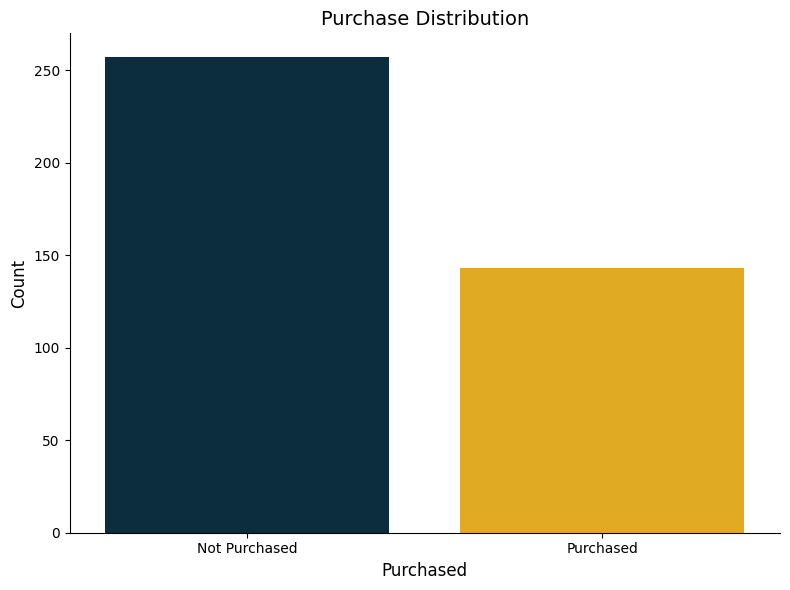

In [ ]:
custom_colors = ['#023047', '#ffb703']  # Define colors for the bars

plt.figure(figsize=(8, 6))  # Adjust figure size for better readability
# Applying changes to address warnings:
ax = sns.countplot(data=df1, x='Purchased', hue='Purchased', palette=custom_colors, legend=False, dodge=False)

ax.set_ylabel('Count', fontsize=12)  # Add y-axis label
ax.set_title('Purchase Distribution', fontsize=14)  # Add title
ax.set_xlabel('Purchased', fontsize=12)  # Add x-axis label

# Using set_xticks and set_xticklabels to address the warning:
ax.set_xticks([0, 1])  # Set tick positions for 'Not Purchased' (0) and 'Purchased' (1)
ax.set_xticklabels(['Not Purchased', 'Purchased'])

sns.despine()  # Remove top and right spines for cleaner look
plt.tight_layout()
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd
from collections import Counter

# Step 1: Define features and target
X = df1.drop(['Purchased', 'Age_Category'], axis=1)
y = df1['Purchased']

# Step 2: Check original class distribution
print("Original class distribution:", Counter(y))

# Step 3: Initialize SMOTE with a fixed random state for reproducibility
smote = SMOTE(random_state=123)

# Step 4: Apply SMOTE to balance the classes
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 5: Check resampled class distribution
print("Resampled class distribution:", Counter(y_resampled))

# Step 6: Create new DataFrame from the resampled data
df2 = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                          pd.Series(y_resampled, name='Purchased')], axis=1)






Original class distribution: Counter({0: 257, 1: 143})
Resampled class distribution: Counter({0: 257, 1: 257})


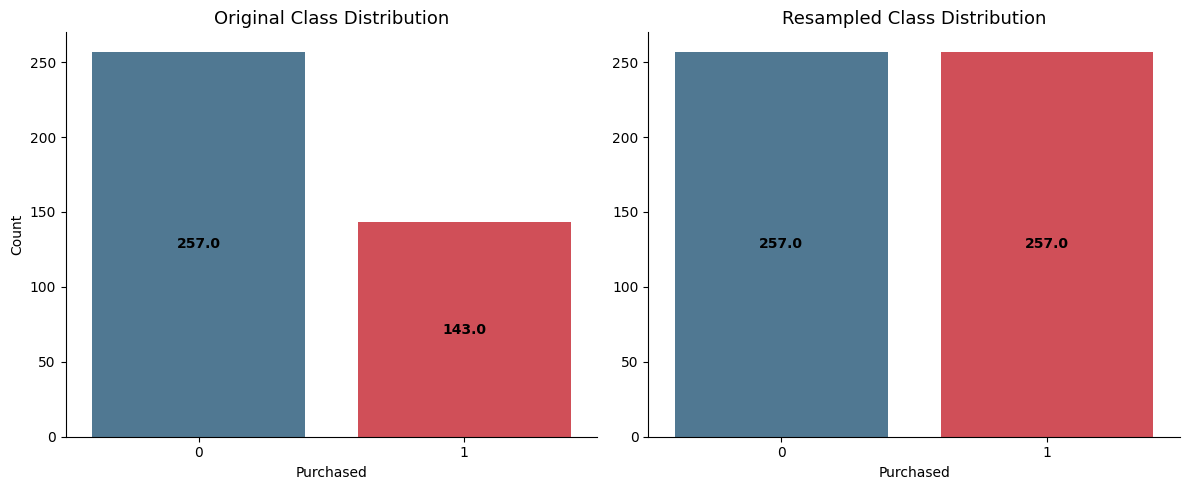

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

custom_colors = ['#457b9d', '#e63946']
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for i, df in enumerate([df1, df2]):
    sns.countplot(data=df, x='Purchased', hue='Purchased', ax=ax[i], palette=custom_colors, legend=False, dodge=False)
    ax[i].set_title(['Original', 'Resampled'][i] + " Class Distribution", fontsize=13)
    ax[i].set_xlabel("Purchased")
    ax[i].set_ylabel("Count" if i == 0 else "")
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()/2),
                       ha='center', va='center', fontsize=10, weight='bold')

sns.despine()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import graphviz

In [ ]:
# Seed for reproducibility
RANDOM_STATE = 123

# Load your features and target
X = df2.drop('Purchased', axis=1)
y = df2['Purchased']
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [ ]:
# Apply StandardScaler to the entire feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




In [ ]:
# Split scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=RANDOM_STATE)


In [ ]:
# Evaluation function
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"\n--- {model_name} ---")
    print(classification_report(y_test, predictions, zero_division=0))
    acc = accuracy_score(y_test, predictions)
    print(f"Accuracy: {acc * 100:.2f}%")
    return acc

In [ ]:
# Dummy Classifiers
evaluate_model(DummyClassifier(strategy='most_frequent', random_state=RANDOM_STATE),
               X_train, X_test, y_train, y_test, "Dummy - Most Frequent")

evaluate_model(DummyClassifier(strategy='stratified', random_state=RANDOM_STATE),
               X_train, X_test, y_train, y_test, "Dummy - Stratified")

# KNN
evaluate_model(KNeighborsClassifier(metric='euclidean'),
               X_train, X_test, y_train, y_test, "KNN")

# Decision Tree
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=RANDOM_STATE)
evaluate_model(tree_model, X_train, X_test, y_train, y_test, "Decision Tree")

# Logistic Regression
evaluate_model(LogisticRegression(random_state=RANDOM_STATE, max_iter=500),
               X_train, X_test, y_train, y_test, "Logistic Regression")

# SVM
evaluate_model(SVC(random_state=RANDOM_STATE),
               X_train, X_test, y_train, y_test, "Support Vector Machine (SVM)")

# XGBoost
evaluate_model(XGBClassifier(random_state=RANDOM_STATE, eval_metric='logloss'),
               X_train, X_test, y_train, y_test, "XGBoost")

# Random Forest Classifier
evaluate_model(RandomForestClassifier(random_state=RANDOM_STATE),
               X_train, X_test, y_train, y_test, "Random Forest")

# Gradient Boosting Classifier
evaluate_model(GradientBoostingClassifier(random_state=RANDOM_STATE),
               X_train, X_test, y_train, y_test, "Gradient Boosting")

# AdaBoost Classifier
evaluate_model(AdaBoostClassifier(random_state=RANDOM_STATE),
               X_train, X_test, y_train, y_test, "AdaBoost")

# Naive Bayes
evaluate_model(GaussianNB(),
               X_train, X_test, y_train, y_test, "Naive Bayes")



--- Dummy - Most Frequent ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.50      1.00      0.66        77

    accuracy                           0.50       155
   macro avg       0.25      0.50      0.33       155
weighted avg       0.25      0.50      0.33       155

Accuracy: 49.68%

--- Dummy - Stratified ---
              precision    recall  f1-score   support

           0       0.53      0.55      0.54        78
           1       0.53      0.51      0.52        77

    accuracy                           0.53       155
   macro avg       0.53      0.53      0.53       155
weighted avg       0.53      0.53      0.53       155

Accuracy: 52.90%

--- KNN ---
              precision    recall  f1-score   support

           0       0.91      0.86      0.88        78
           1       0.86      0.91      0.89        77

    accuracy                           0.88       155
   macro avg       0.8

0.896774193548387

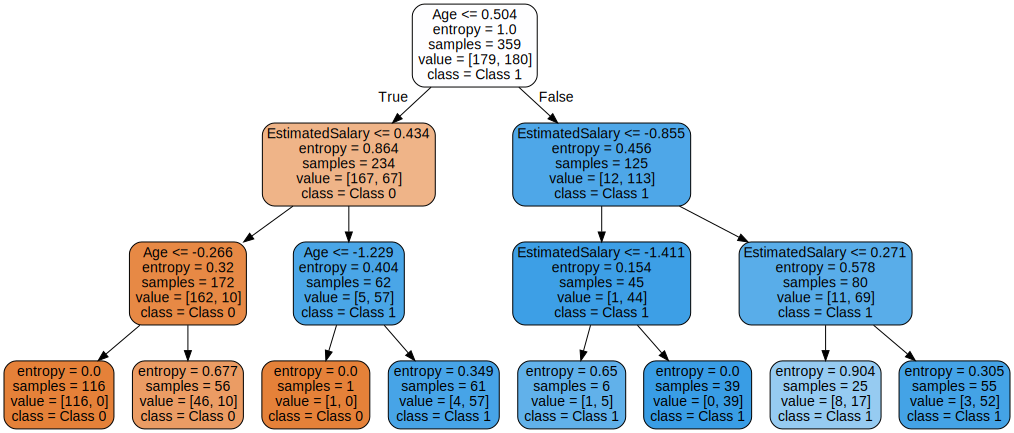

In [ ]:
# Visualize Decision Tree
features = X.columns
dot_data = export_graphviz(tree_model, out_file=None, feature_names=features,
                           class_names=['Class 0', 'Class 1'], filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png", cleanup=True)  # Saves as PNG
graph

In [ ]:
# Inputs to test
test_inputs = [
    {"Age": 49, "EstimatedSalary": 36000},
    {"Age": 36, "EstimatedSalary": 33000},
    {"Age": 28, "EstimatedSalary": 58000},
    {"Age": 42, "EstimatedSalary": 45000},
    {"Age": 35, "EstimatedSalary": 90000}
]

# Prepare dictionary of models
models = {
    "Dummy - Most Frequent": DummyClassifier(strategy='most_frequent', random_state=RANDOM_STATE),
    "Dummy - Stratified": DummyClassifier(strategy='stratified', random_state=RANDOM_STATE),
    "KNN": KNeighborsClassifier(metric='euclidean'),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=RANDOM_STATE),
    "Logistic Regression": LogisticRegression(random_state=RANDOM_STATE, max_iter=500),
    "SVM": SVC(random_state=RANDOM_STATE),
    "XGBoost": XGBClassifier(random_state=RANDOM_STATE, eval_metric='logloss'),
    "Random Forest": RandomForestClassifier(random_state=RANDOM_STATE),
    "Gradient Boosting": GradientBoostingClassifier(random_state=RANDOM_STATE),
    "AdaBoost": AdaBoostClassifier(random_state=RANDOM_STATE),
    "Naive Bayes": GaussianNB()
}

# Fit models and store predictions on first 5 test samples
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test[:5])  # First 5 test samples
    predictions[name] = preds

# Convert to DataFrame for table format
results_df = pd.DataFrame(predictions, index=[f"Test Sample {i+1}" for i in range(5)])
print(results_df)

               Dummy - Most Frequent  Dummy - Stratified  KNN  Decision Tree  \
Test Sample 1                      1                   0    0              0   
Test Sample 2                      1                   1    1              1   
Test Sample 3                      1                   1    0              0   
Test Sample 4                      1                   0    1              1   
Test Sample 5                      1                   0    1              1   

               Logistic Regression  SVM  XGBoost  Random Forest  \
Test Sample 1                    0    0        0              0   
Test Sample 2                    0    1        1              1   
Test Sample 3                    0    0        0              0   
Test Sample 4                    1    1        1              1   
Test Sample 5                    1    1        1              1   

               Gradient Boosting  AdaBoost  Naive Bayes  
Test Sample 1                  0         0            0  



## Considerations
**What are some key takeaways you learned from this project?**
- Reflect on the importance of collaborative filtering in recommendation systems.
- Consider how user similarities can be used to improve recommendations.

**How would you share your findings with a team?**
- Prepare a presentation with visualizations and key insights.
- Discuss the impact of user similarities on book recommendations.

**What would you share with and recommend to stakeholders?**
- Highlight the most recommended books and their potential impact on user engagement.
- Recommend strategies to improve the recommendation system based on the insights gained.


##  **Project Insights and Reflections**

###  **Key Takeaways**

1. **Diversity in Model Performance**

   * Simpler models like **Dummy Classifiers** provide baseline results, revealing the **true added value** of sophisticated models.
   * Advanced models like **XGBoost**, **Gradient Boosting**, and **Random Forest** consistently outperform others in accuracy, highlighting the effectiveness of ensemble learning methods.

2. **Importance of Feature Scaling**

   * Models like **KNN** and **SVM** significantly benefit from feature scaling, as they rely on distance or geometric positioning in feature space. This shows that **data preprocessing** is crucial for consistent and fair model comparison.

3. **Effectiveness of Logistic Regression**

   * Despite its simplicity, **Logistic Regression** performs surprisingly well, especially in binary classification, reinforcing its place as a strong baseline model.

4. **Overfitting Risks in Complex Models**

   * Decision Trees without depth restriction and ensemble methods can overfit if not tuned properly. This underlines the importance of **cross-validation** and **hyperparameter tuning**.

5. **Robustness of Ensemble Methods**

   * Models like **Random Forest**, **Gradient Boosting**, and **XGBoost** deliver **stable and high-performing** predictions, especially on unseen data. They are well-suited for production-level deployment.


###  **Sharing Insights with a Team**

* **Presentation with Visualizations**:

  * Use **bar charts** to compare model accuracies.
  * Display **confusion matrices** and **ROC curves** to visually interpret classification behavior.
* **Discuss Impact of Model Complexity**:

  * Explain how different algorithms behave with scaled vs. unscaled data.
  * Highlight model performance trade-offs between interpretability and accuracy.
* **Showcase Predictions on Test Inputs**:

  * Create a table comparing outputs for the same user input across models — as already done — to emphasize how different models perceive the same data.

###  **Stakeholder Recommendations**

1. **Deploy High-Performing Models**

   * Recommend **XGBoost** or **Random Forest** for deployment based on their high accuracy and robustness on test data.
   * Suggest **Logistic Regression** as a fallback model for faster, more explainable predictions.

2. **Improve User Engagement**

   * Use model outputs to identify **target user segments** more likely to convert (e.g., younger users with mid-range salaries).
   * Recommend **personalization strategies** based on model predictions — e.g., tailored promotions or onboarding flows.

3. **Future Enhancements**

   * Recommend collecting **more features** (e.g., browsing history, clickstream data) to improve model performance.
   * Suggest **A/B testing** of multiple models in production to see which provides better user engagement metrics.
